Chapter 19  
# 斐波那契数列
Book_2《可视之美》 | 鸢尾花书：从加减乘除到机器学习  

In [1]:
# 导入包
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D

In [2]:
# 使用递归函数生成 Fibonacci 数列
def fibonacci(n):
    # 如果 n 小于或等于 1，它将直接返回 n
    if n <= 1:
        return n
    # 否则，它将调用两次自己
    # 并将 n-1 和 n-2 作为参数传递给它们
    else:
        return fibonacci(n-1) + fibonacci(n-2)

## 生成数列

In [3]:
num = 9
idx_array = np.arange(num)
# 从0开始的斐波那契数列
fibonacci_array = np.array([fibonacci(i) for i in range(num)])

In [4]:
# 从1开始的斐波那契数列
fibonacci_array_from_1 = np.array([fibonacci(i) for i in np.arange(1, num + 1)])

## 准备数据

In [5]:
# 正方形 x 坐标
x_array = 0 + fibonacci_array_from_1 * (-1) ** (np.floor(idx_array/2) + 2)
x_array = np.insert(x_array, 0, 0)
x_array = np.cumsum(x_array)

In [6]:
# 正方形 y 坐标
y_array = 0 + fibonacci_array_from_1 * (-1) ** (np.floor((1 + idx_array)/2) + 1)
y_array = np.insert(y_array, 0, 0)
y_array = np.cumsum(y_array)

In [7]:
# 正方形旋转角度，逆时针为正
rotation = (idx_array - 1) * 90

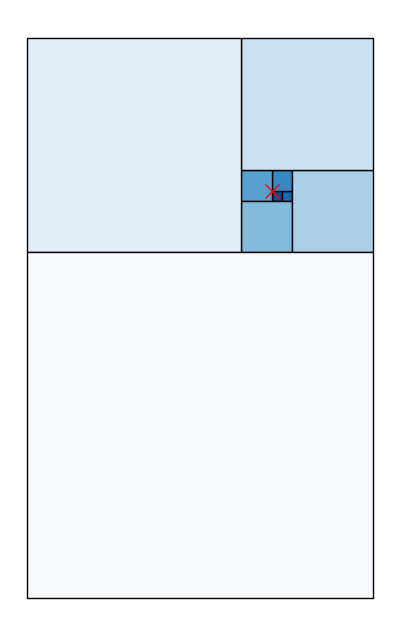

In [10]:
fig, ax = plt.subplots(figsize = (8,8))

colors = plt.cm.Blues_r(np.linspace(0,1,num + 1))

for i in idx_array:
    rotate_i = rotation[i]
    side_idx = fibonacci_array_from_1[i]
    rec_loc_idx = np.array([x_array[i], y_array[i]]) 

    rec = plt.Rectangle(rec_loc_idx, 
                        width =side_idx, 
                        height=side_idx, 
                        facecolor=colors[i + 1], 
                        edgecolor = 'k',
                        transform=Affine2D().rotate_deg_around(
                           x_array[i], y_array[i], rotate_i) 
                        + ax.transData)
    ax.add_patch(rec)

ax.set_aspect('equal')
ax.plot(0, 0,  color='r', marker='x', markersize=10)
ax.axis('off')   
plt.show()